<a href="https://colab.research.google.com/github/rohansingharia03/projects/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install openpyxl

IMPORTING NECESSARY LIBRARIES

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [35]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-25 15:22:25--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [      <=>           ]  22.62M  17.0MB/s    in 1.3s    

2025-02-25 15:22:26 (17.0 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [36]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [37]:
df1  = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})

In [38]:
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [39]:
df1.shape

(541909, 8)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


Data Cleaning: Handle Missing Values

In [41]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [42]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [43]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [44]:
most_freq = df1[["Description", "StockCode"]].value_counts().reset_index()
most_freq

,Description,StockCode,count
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2302
1,REGENCY CAKESTAND 3 TIER,22423,2200
2,JUMBO BAG RED RETROSPOT,85099B,2159
3,PARTY BUNTING,47566,1727
4,LUNCH BAG RED RETROSPOT,20725,1638
...,...,...,...
4787,?,20866,1
4788,WOOLLY HAT SOCK GLOVE ADVENT STRING,35832,1
4789,?,20700,1
4790,?,20694,1


In [45]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq.columns=["freq_description", "StockCode", "count"]
most_freq

,freq_description,StockCode,count
0,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2302
1,REGENCY CAKESTAND 3 TIER,22423,2200
2,JUMBO BAG RED RETROSPOT,85099B,2159
3,PARTY BUNTING,47566,1727
4,LUNCH BAG RED RETROSPOT,20725,1638
...,...,...,...
4767,WOVEN BUBBLE GUM CUSHION COVER,46776a,1
4769,WOVEN BERRIES CUSHION COVER,46776b,1
4781,"LETTER ""U"" BLING KEY RING",90214U,1
4784,LIGHT DECORATION BATTERY OPERATED,47016,1


In [46]:
df2= df1.merge(most_freq, on="StockCode", how="left")
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [47]:
df2['Description'] = df2["freq_description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [48]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_description,112
count,112


In [49]:
df2.dropna(subset=['Description'], inplace=True)


In [50]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_description,0
count,0


In [51]:
df2.drop(columns=['freq_description', 'count'], inplace=True)



In [52]:
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Cleaning: Handle Invalid Values

In [53]:
df3 = df2[(df2.Quantity>0) & (df2.UnitPrice>0)]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [54]:
df4 = df3.copy()
df4['Total_sales'] = df4['Quantity'] * df4['UnitPrice']

In [55]:
df4['Month'] = df4.InvoiceDate.dt.month
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


DATA VISUALIZATION & EDA

1. PLOT MONTHLY SALES

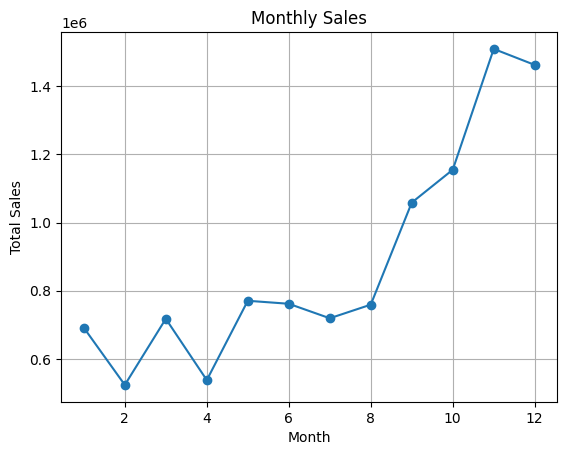

In [56]:
df4.groupby('Month')['Total_sales'].sum().plot(kind='line', title = 'Monthly Sales', marker="o")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

TOP 5 COUNTRIES BY SALES

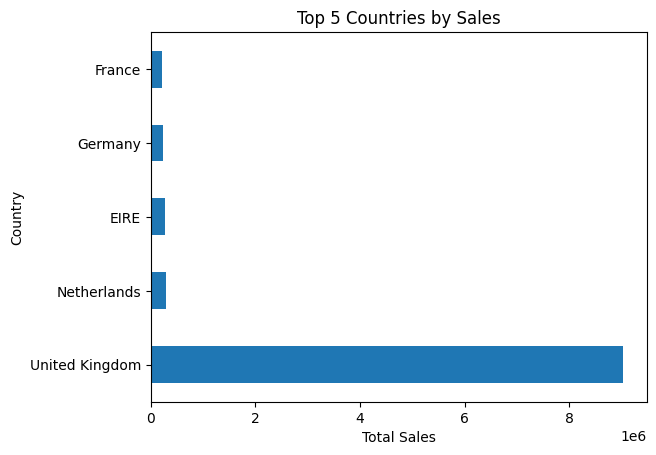

In [57]:
df4.groupby('Country')['Total_sales'].sum().nlargest(5).plot(kind='barh', title='Top 5 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [58]:
country_wise_sales = df4.groupby('Country')['Total_sales'].sum()

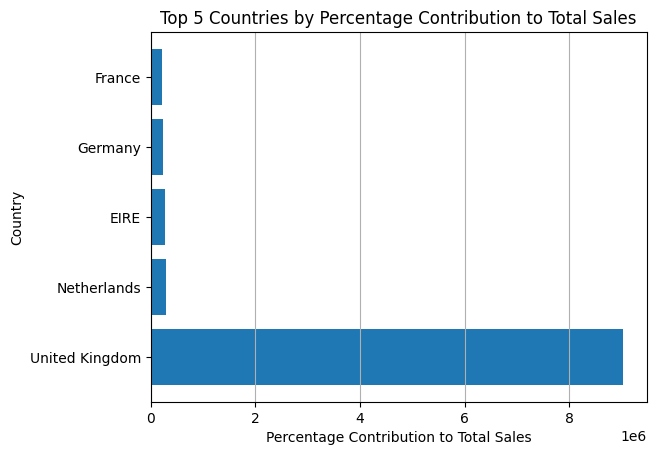

In [59]:
top_5_countries = country_wise_sales.nlargest(5)
percentage = (top_5_countries/df4.Total_sales)*100
bars = plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')
plt.show()

PRODUCT WISE SALES

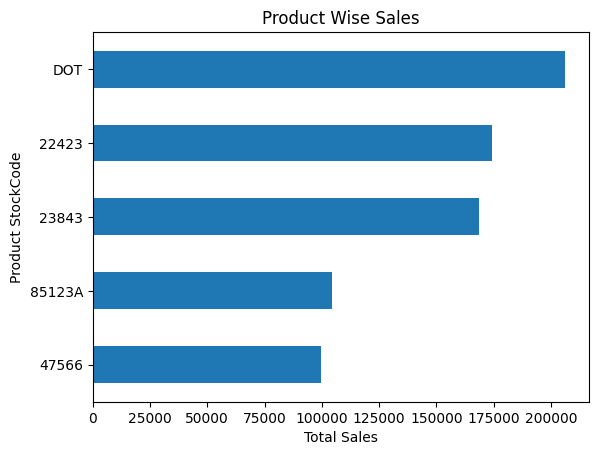

In [65]:
product_wise_sales = df4.groupby('StockCode')['Total_sales'].sum().nlargest(5)
product_wise_sales.plot(kind='barh', title = 'Product Wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product StockCode')
plt.gca().invert_yaxis()
plt.show()

In [61]:
top_5_products = product_wise_sales
top_5_products

,Total_sales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33


In [74]:
for stock_code in top_5_products.index:
  description=(df4[df4.StockCode == stock_code].Description.iloc[0])
  print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


RFM ANALYSIS

In [66]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days = 1)
current_date

Timestamp('2011-12-10 12:50:00')

In [67]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x : (current_date - x.max()).days,
    "InvoiceNo" : 'count',
    "Total_sales" : 'sum'})
rfm.columns = ['Recency', 'Frequency', 'Monetry']
rfm.head()

,Recency,Frequency,Monetry
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [68]:
rfm['R_segment'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_segment'] = pd.qcut(rfm['Monetry'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_segment', 'F_segment', 'M_segment']].sum(axis=1)
rfm.sort_values('RFM_Score' , ascending=False)



,Recency,Frequency,Monetry,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


In [70]:
churn_threshold = 90
churned_customer = (rfm.Recency>churn_threshold)
churned_customers_recency = rfm[churned_customer]['Recency']
churned_customers_recency

,Recency
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214
...,...
18262.0,140
18268.0,134
18269.0,366


NO. of Churned Customers 1449


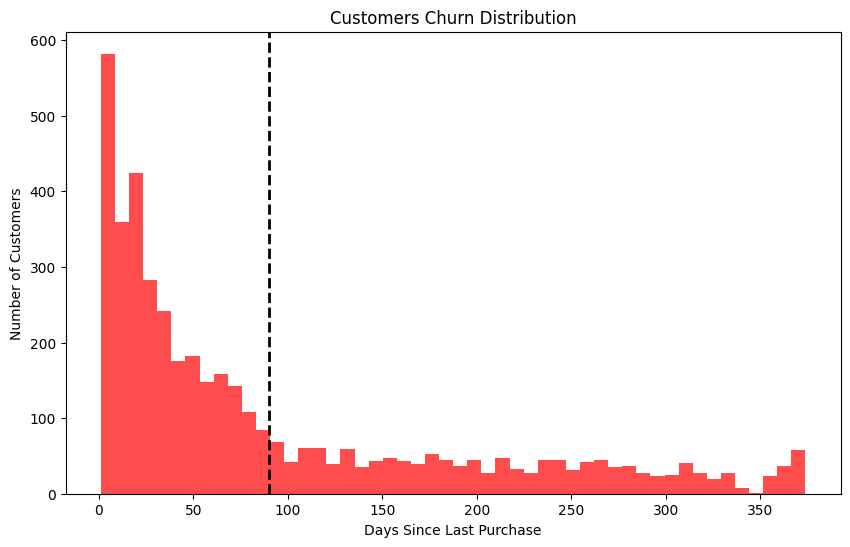

In [90]:
print("NO. of Churned Customers", len(churned_customers_recency))
plt.figure(figsize=(10,6))
plt.hist(rfm.Recency, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customers Churn Distribution')
plt.show()